In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/suv-data/suv_data.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../input/suv-data/suv_data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


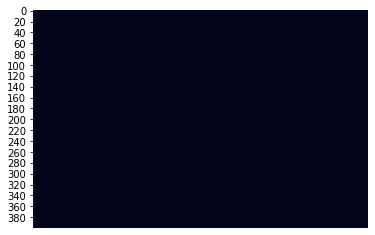

In [4]:
df.isnull()
df.isnull().sum()
sns.heatmap(df.isnull(), xticklabels=False,cbar=False)

In [5]:
dfNew = df.drop(['User ID','Gender'], axis=1, inplace=False)
dfNew.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
x = dfNew.drop(['Purchased'], axis=1, inplace=False)
y = df['Purchased']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.1,random_state=1)


In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)
model.score(x_test,y_test)

0.625

In [9]:
from sklearn.metrics import classification_report
classification_report(y_test,predict)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.62      1.00      0.77        25\n           1       0.00      0.00      0.00        15\n\n    accuracy                           0.62        40\n   macro avg       0.31      0.50      0.38        40\nweighted avg       0.39      0.62      0.48        40\n'

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict)

array([[25,  0],
       [15,  0]])

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.625